# Support Vector Machines

- Supervised learning
- Used for regression and classification

Think of a line separating two clusters of groups, SVM creates a separation line with the largest separation between groups, closest samples to line are called support vectors

## Linear Support Vector Classification

Types of margin separation:

- Hard Margin: Strictly based on the support vectors that lie close to the margin for each class, sensitive to outliers
- Soft Margin: Wider margin, can allow for violation, can control width in ```sklearn``` with ```C``` parameter (high is smaller margin, ie less margin violations)

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from sklearn import datasets 
from sklearn import svm 
import matplotlib.pyplot as plt

In [8]:
iris = sns.load_dataset('iris')

In [9]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
col = ['petal_length', 'petal_width']
X = iris.loc[:, col]

species_to_num = {'setosa' : 0,
                  'versicolor' : 1,
                  'virginica' : 2}
iris['tmp'] = iris['species'].map(species_to_num)
y = iris['tmp']

SVC - C-Support Vector Classification, fit time complexity is more than quadratic, reasonable upper limit of fit around 20,000 samples

LinearSVC - Similar to SVC with linear kernal selected, more flexibility in choice of penalties and loss functions 

In [18]:
C = 0.001 # small c - hard margin 
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y)

SVC(C=0.001, kernel='linear')

In [22]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

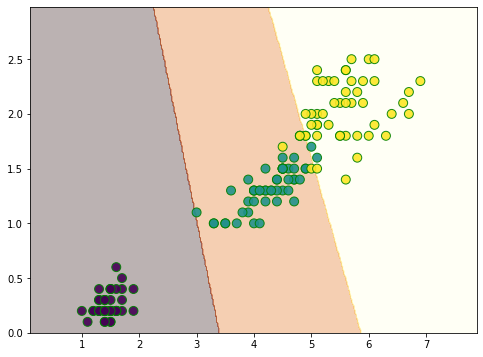

In [25]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

# Linear SVM Implementation

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0
)

In [32]:
# scale
sc_x = StandardScaler()
x_std_train = sc_x.fit_transform(X_train)
C = 1
clf = svm.SVC(kernel='linear', C=C)
clf.fit(x_std_train, y_train)

SVC(C=1, kernel='linear')

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [37]:
res = cross_val_score(clf, x_std_train, y_train, cv=10, scoring='accuracy')
print('Accuracy:',np.mean(res))
print('STD:', np.std(res))

Accuracy: 0.95
STD: 0.055277079839256664


In [39]:
y_train_pred = cross_val_predict(clf, x_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[39,  0,  0],
       [ 0, 34,  3],
       [ 0,  3, 41]], dtype=int64)

In [41]:
precision_score(y_train, y_train_pred,average='weighted')

0.95

In [42]:
recall_score(y_train, y_train_pred, average='weighted')

0.95

In [44]:
f1_score(y_train, y_train_pred, average='weighted')

0.95

## CV with Test Data

In [47]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2,  4]], dtype=int64)

In [48]:
precision_score(y_test, y_test_pred,average='weighted')

0.9422222222222222

In [49]:
recall_score(y_test, y_test_pred,average='weighted')

0.9333333333333333

In [50]:
f1_score(y_test, y_test_pred,average='weighted')

0.929047619047619

# Polynomial Kernel

- Separate classes using a polynomial line

In [54]:
C = 1
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X, y)

SVC(C=1, gamma='auto', kernel='poly')

In [55]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

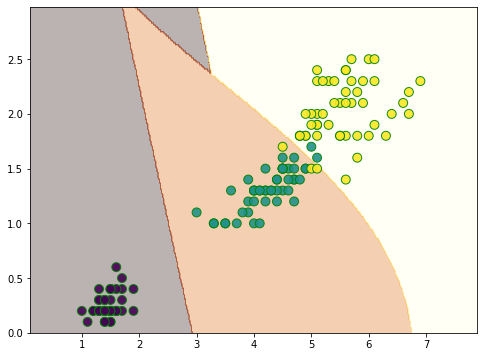

In [56]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

## Polynomial Implementation

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=0
)
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [59]:
C = 1
clf = svm.SVC(kernel='poly', degree=10, C=C, gamma='auto')
clf.fit(X_std_train, y_train)

SVC(C=1, degree=10, gamma='auto', kernel='poly')

In [62]:
# CV
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print('Accuracy:',np.mean(res))
print('STD:',np.std(res))

Accuracy: 0.7833333333333334
STD: 0.14043582955293932


In [63]:
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

In [64]:
confusion_matrix(y_train, y_train_pred)

array([[35,  0,  4],
       [ 0, 37,  0],
       [ 7, 18, 19]], dtype=int64)

In [65]:
precision_score(y_train, y_train_pred, average='weighted')

0.7811561264822134

In [66]:
recall_score(y_train, y_train_pred, average='weighted')

0.7583333333333333

In [67]:
f1_score(y_train, y_train_pred, average='weighted')

0.7368316429126509

## Parameter Tuning

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

In [80]:
svm.SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [97]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [98]:
params = {
    'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20),
    'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)
}

In [99]:
svm_grid_rbf = GridSearchCV(
    pipeline, params, n_jobs=-1, cv=3,
    verbose=1, scoring='accuracy'
)

In [100]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', SVC(C=1, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             scoring='accuracy', verbose=1)

In [101]:
svm_grid_rbf.best_score_

0.9583333333333334

In [105]:
svm_grid_rbf.best_estimator_

Pipeline(steps=[('clf', SVC(C=0.5, gamma=0.5))])

In [106]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [107]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Perfect Model!

In [108]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

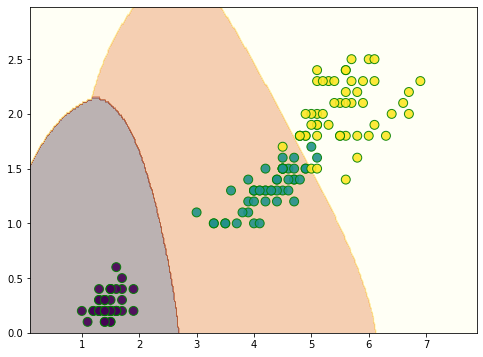

In [110]:
z = svm_grid_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

# Support Vector Regression

In [115]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_boston
boston_data = load_boston()
boston = pd.DataFrame(
    boston_data.data, columns=boston_data.feature_names
)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [116]:
y = boston_data.target
X = boston[['LSTAT']].values

In [118]:
svr = SVR(gamma='auto')
svr.fit(X, y)

SVR(gamma='auto')

In [119]:
sort_idx = X.flatten().argsort()

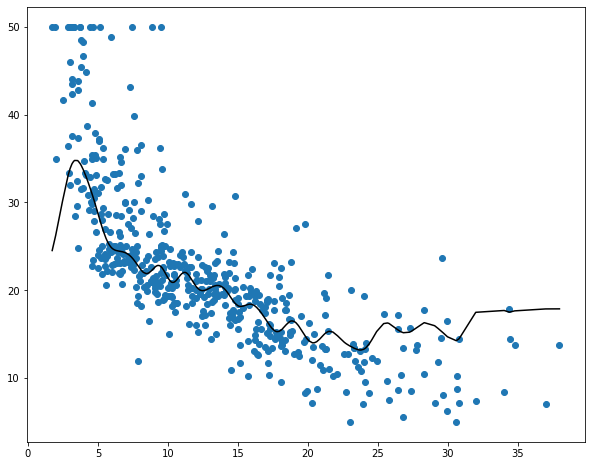

In [120]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color='k')

## Advantages / Disadvantages

Advantages: 
- Effective in high dimensional spaces
- Uses only a subset of training points 
- Many different kernel functions (linear, polynomial, RBF, sigmoid)

Disadvantages:
- Can overfit when features outnumber samples
- Choice of kernel and regularization can have large impact on results
- No probability estimates
- Computationally expensive